In [14]:
%pip install networkx

  Obtaining dependency information for networkx from https://files.pythonhosted.org/packages/b9/54/dd730b32ea14ea797530a4479b2ed46a6fb250f682a9cfb997e968bf0261/networkx-3.4.2-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.7 MB ? eta -:--:--
   ----- ---------------------------------- 0.2/1.7 MB 3.4 MB/s eta 0:00:01
   --------------- ------------------------ 0.7/1.7 MB 6.1 MB/s eta 0:00:01
   ------------------------------- -------- 1.4/1.7 MB 8.7 MB/s eta 0:00:01
   ---------------------------------------- 1.7/1.7 MB 9.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [255]:
import LineConnect as LC 

In [236]:


# Create synthetic lines for testing
lines = [
    LineString([(0, 0), (5, 5)]),   # Line 0
    LineString([(5.2, 5.2), (10, 10)]),  # Line 1- near 0, same direction
    LineString([(0, 5), (5, 0)]),   # Line 2 - crosses 0, different direction
    LineString([(11, 10), (15, 14)]), # Line 3 - far, but same angle
    LineString([(6, 7), (6, 11)]),  # Line 4 - parallel/near 1 but vertical
    LineString([(5, 7), (5, 11)]),  # Line 5 - vertical, near 1
    LineString([(5, 11.5),(6, 15)]),  # Line 6 - 
    LineString([(10.2, 10.2),(12.2,12.2 )]),  # Line 7  
    LineString([(12.5, 12.5), (15.4, 15.2)]), # Line 8
    LineString([(6, 12.3), (7, 15.4)]), # Line 9
    LineString([(6, 0), (12, 1)]), # Line 10
]

gdf = gpd.GeoDataFrame(geometry=lines)


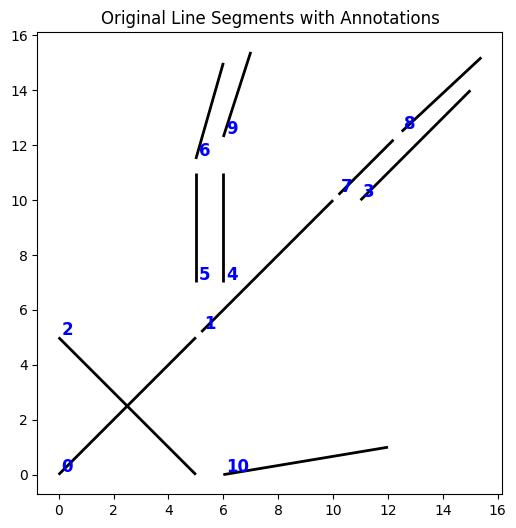

In [ ]:
def plot_lines(lines, ax=None):
    # Plot the lines
    fig, ax = plt.subplots(figsize=(6, 6))
    gdf.plot(ax=ax, color='black', linewidth=2)
    # Annotate each line with its label
    for idx, line in enumerate(gdf.geometry):
        x, y = line.coords[0]  # Get the starting point of the line
        ax.annotate(str(idx), (x+.1, y+.1), color='blue', fontsize=12, weight='bold')
    plt.title("Original Line Segments with Annotations")
    plt.axis('equal')
    plt.show()

### Functions

angle_between_lines(line1, line2)
        """Calculates the absolute angular difference (in degrees) between two lines,
        normalized to 0–180° to avoid directionality."""

In [314]:
## check angle_between_lines() function
angle = LC.angle_between_lines(lines[0], lines[2]) # should be 90 degrees

print(f"Angle between line {0} and line {2}: {angle:.2f} degrees")

Angle between line 0 and line 2: 90.00 degrees


In [315]:
## now lets get the angle for all line pairs

angles_list = [] # initiate an empty list to store the angles

for i, line1 in enumerate(lines): # Loop through each line
    for j, line2 in enumerate(lines): # Compare with every other line
        # Skip the same line or if the lines are not close enough
        if i >= j:
            continue
        angle = LC.angle_between_lines(line1, line2)
        entry = f"Angle between line {i} and line {j}: {angle:.2f} degrees"
        angles_dict = {
            'line1': i,
            'line2': j,
            'angle': angle,
            'entry': entry
        }
        angles_list.append(angles_dict)

print(angles_list[1:10])    # Print the first 10 angles for brevity

[{'line1': 0, 'line2': 2, 'angle': 90.0, 'entry': 'Angle between line 0 and line 2: 90.00 degrees'}, {'line1': 0, 'line2': 3, 'angle': 0.0, 'entry': 'Angle between line 0 and line 3: 0.00 degrees'}, {'line1': 0, 'line2': 4, 'angle': 45.0, 'entry': 'Angle between line 0 and line 4: 45.00 degrees'}, {'line1': 0, 'line2': 5, 'angle': 45.0, 'entry': 'Angle between line 0 and line 5: 45.00 degrees'}, {'line1': 0, 'line2': 6, 'angle': 29.054604099077153, 'entry': 'Angle between line 0 and line 6: 29.05 degrees'}, {'line1': 0, 'line2': 7, 'angle': 0.0, 'entry': 'Angle between line 0 and line 7: 0.00 degrees'}, {'line1': 0, 'line2': 8, 'angle': 2.04540848888724, 'entry': 'Angle between line 0 and line 8: 2.05 degrees'}, {'line1': 0, 'line2': 9, 'angle': 27.121303404158667, 'entry': 'Angle between line 0 and line 9: 27.12 degrees'}, {'line1': 0, 'line2': 10, 'angle': 35.53767779197438, 'entry': 'Angle between line 0 and line 10: 35.54 degrees'}]


endpoints_close(line1, line2, dist_thresh=1.0)
"""
Returns True if any endpoint of line1 is within dist_thresh of any endpoint of line2.
"""

In [316]:

bool = LC.endpoints_close(lines[0],lines[1], 2.0) # should be true
print(f"Lines 0 and 1 endpoints within {2.0} units: {bool}")
bool = LC.endpoints_close(lines[4],lines[5],2.0) # should be true 
print(f"Lines 4 and 5 endpoints within {2.0} units: {bool}")
bool = LC.endpoints_close(lines[0],lines[5],2.0) # should be false 
print(f"Lines 0 and 5 endpoints within {2.0} units: {bool}")
bool = LC.endpoints_close(lines[1],lines[3],2.0) # should be true 
print(f"Lines 1 and 3 endpoints within {2.0} units: {bool}")
bool = LC.endpoints_close(lines[4],lines[5],1.0) # should be False notice distance threshold is 1.0
print(f"Lines 4 and 5 endpoints within {1.0} units: {bool}")
bool = LC.endpoints_close(lines[5],lines[6],0.6) # should be True
print(f"Lines 5 and 6 endpoints within {0.6} units: {bool}")

Lines 0 and 1 endpoints within 2.0 units: True
Lines 4 and 5 endpoints within 2.0 units: True
Lines 0 and 5 endpoints within 2.0 units: False
Lines 1 and 3 endpoints within 2.0 units: True
Lines 4 and 5 endpoints within 1.0 units: False
Lines 5 and 6 endpoints within 0.6 units: True


```
directional_collinearity_score(line1, line2):
    """
    Computes a 'collinearity score' based on how well line2 continues from line1.
    Lower scores mean better directional collinearity.
    """
```

In [317]:
# do some checks to ensure the collinearity score is working as expected
score = LC.directional_collinearity_score(lines[0], lines[1]) # should be 0
print(f"Directional collinearity score between line {0} and line {1}: {score:.2f}")
score = LC.directional_collinearity_score(lines[1], lines[3]) # should be 0.765
print(f"Directional collinearity score between line {1} and line {3}: {score:.2f}")
score = LC.directional_collinearity_score(lines[4], lines[6]) # should be 0
print(f"Directional collinearity score between line {4} and line {6}: {score:.2f}")
score = LC.directional_collinearity_score(lines[5], lines[6]) # should be 0 
print(f"Directional collinearity score between line {5} and line {6}: {score:.2f}")


Directional collinearity score between line 0 and line 1: 0.00
Directional collinearity score between line 1 and line 3: 0.77
Directional collinearity score between line 4 and line 6: 1.18
Directional collinearity score between line 5 and line 6: 0.00


```
def is_merge_candidate(line1, line2, angle_thresh=10, dist_thresh=2.0, collinearity_thresh=1.0):
    """
    Uses angle, endpoint proximity, and directional collinearity score.
    """
```

In [318]:
is_merge_candidate(lines[0], lines[1],angle_thresh=0.5, dist_thresh=0.3, collinearity_thresh=0.1) # should be true even at very low values

True

In [319]:
is_merge_candidate(lines[1], lines[3],angle_thresh=10, dist_thresh=2.0, collinearity_thresh=1.0)  # should be true

True

In [320]:
is_merge_candidate(lines[1], lines[3],angle_thresh=0, dist_thresh=2.0, collinearity_thresh=0.5) # should be false as we decrease colinearity threshold

False

In [321]:
is_merge_candidate(lines[1], lines[3],angle_thresh=0, dist_thresh=1.0, collinearity_thresh=1) # should be false as we decrease distance threshold

False

In [322]:
is_merge_candidate(lines[4], lines[9],angle_thresh=20, dist_thresh=3, collinearity_thresh=1) # should be false as we decrease distance threshold

True

In [323]:
def find_merge_pairs(gdf, angle_thresh=16, dist_thresh=2.0, collinearity_thresh=0.5):
    merge_pairs = []
    for i, line1 in enumerate(gdf.geometry):
        for j, line2 in enumerate(gdf.geometry):
            if i >= j:
                continue
            if is_merge_candidate(line1, line2, angle_thresh, dist_thresh, collinearity_thresh):
                merge_pairs.append((i, j))
    return merge_pairs

merge_pairs = find_merge_pairs(gdf, angle_thresh=20, dist_thresh=3, collinearity_thresh=0.5)
print("Merge Candidates (by index):", merge_pairs)

Merge Candidates (by index): [(0, 1), (1, 7), (4, 9), (5, 6), (7, 8)]


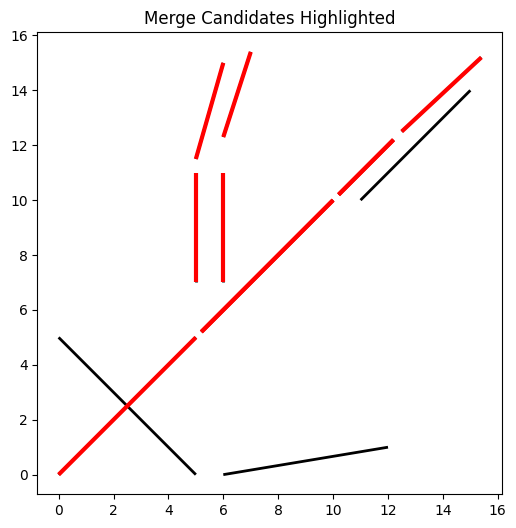

In [324]:
# Highlight merge candidate pairs
fig, ax = plt.subplots(figsize=(6, 6))
gdf.plot(ax=ax, color='black', linewidth=2)
for i, j in merge_pairs:
    gdf.iloc[[i, j]].plot(ax=ax, color='red', linewidth=3)
plt.title("Merge Candidates Highlighted")
plt.axis('equal')
plt.show()

In [325]:
def connect_lines_by_bridge(lines_to_merge):
    endpoints = []
    for ln in lines_to_merge:
        endpoints.append(Point(ln.coords[0]))
        endpoints.append(Point(ln.coords[-1]))

    min_dist = float("inf")
    pair = (None, None)
    for i in range(len(endpoints)):
        for j in range(i+1, len(endpoints)):
            d = endpoints[i].distance(endpoints[j])
            if d < min_dist:
                min_dist = d
                pair = (endpoints[i], endpoints[j])

    connector = LineString([pair[0], pair[1]])
    combined = unary_union(lines_to_merge + [connector])
    return linemerge(combined), connector

In [326]:
def locally_merge_lines(lines, search_dist=10.0, angle_thresh=3, collinearity_thresh=0.5):
    lines = list(lines)  # mutable copy
    i = 0
    while i < len(lines):
        line = lines[i]
        match_found = False

        for j in range(len(lines)):
            if i == j:
                continue

            # Skip if lines are far apart
            if line.distance(lines[j]) > search_dist:
                continue

            # Check angle, collinearity, etc.
            if is_merge_candidate(line, lines[j], angle_thresh, dist_thresh=search_dist, collinearity_thresh=collinearity_thresh):
                # Build bridge + merged line
                merged_line, connector = connect_lines_by_bridge([line, lines[j]])

                # Replace line i with merged
                lines[i] = merged_line

                # Remove line j
                lines.pop(j)
                match_found = True
                break  # restart with updated line[i]

        if not match_found:
            i += 1  # move to next line

    return lines

In [327]:
new_merged_lines = locally_merge_lines(lines, search_dist=10.0, angle_thresh=20, collinearity_thresh=0.5)
gdf_new = gpd.GeoDataFrame(geometry=new_merged_lines)

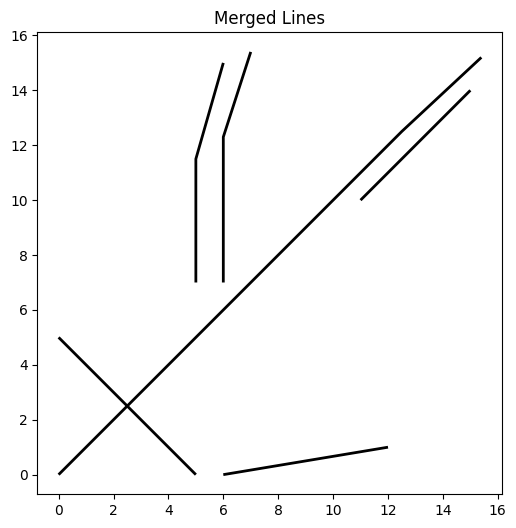

In [328]:
# Plot the lines
fig, ax = plt.subplots(figsize=(6, 6))
gdf_new.plot(ax=ax, color='black', linewidth=2)

#labels = ['0', '1', '2', '3', '4', '5','6','7','8']  # Labels for the lines

# Annotate each line with its label
for idx, line in enumerate(gdf_new.geometry):
    x, y = line.coords[0]  # Get the starting point of the line
    #ax.annotate(labels[idx], (x, y), color='blue', fontsize=12, weight='bold')

plt.title("Merged Lines")
plt.axis('equal')
plt.show()
